<a href="https://www.kaggle.com/code/mosesmoncy/titanic-passenger-death-and-embarked-prediction?scriptVersionId=127944898" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

The sinking of the RMS Titanic in 1912 is one of the most famous and tragic events in maritime history. The disaster claimed the lives of over 1,500 passengers and crew members, and its impact is still felt today. In this project, we will explore a machine learning model that predicts whether a Titanic passenger survived or died, as well as the location where they embarked on the ship.



Look at the survival rate by sex and class. From the pivot table below, we see that females in first class had a survival rate of about 96.8%, meaning the majority of them survived. Males in third class had the lowest survival rate at about 13.54%, meaning the majority of them did not survive.



Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown. More than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded from Queenstown.



Machine Learning model is created using 5 Classification models to predict whether the passenger have survived or not and their respective location from they embarked.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
# Importing Train dataset

a=pd.read_csv('/kaggle/input/train-datsset/train.csv')
a

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Importing test dataset

a1=pd.read_csv('/kaggle/input/test-dataset/test.csv')
a1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
# to read first five data from the dataset
a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# to read the last five data from the dataset
a.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# to read the column names
a.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# to check wheather any missing values in the datset 
a.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
a.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

0    549
1    342
Name: Survived, dtype: int64

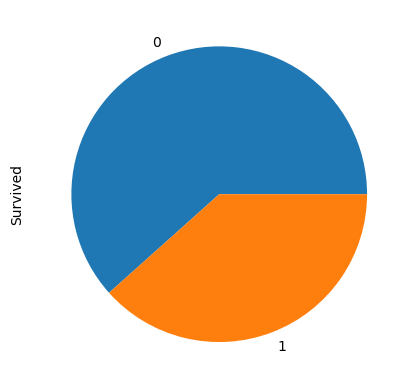

In [9]:
a['Survived'].value_counts().plot(kind='pie')
a['Survived'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

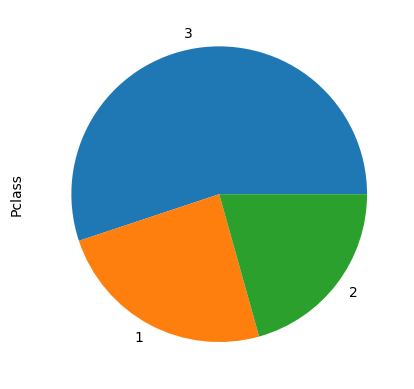

In [10]:
a['Pclass'].value_counts().plot(kind='pie')
a['Pclass'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

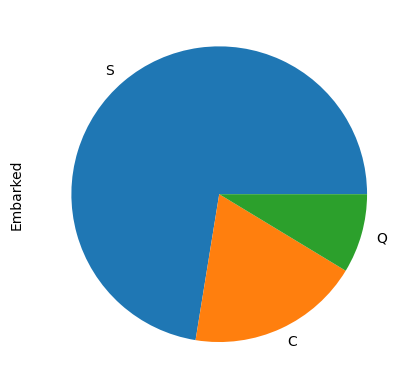

In [11]:
a['Embarked'].value_counts().plot(kind='pie')
a['Embarked'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

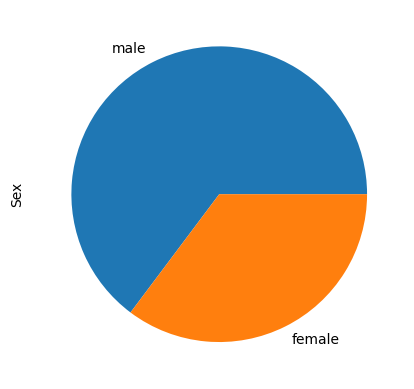

In [12]:
a['Sex'].value_counts().plot(kind='pie')
a['Sex'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

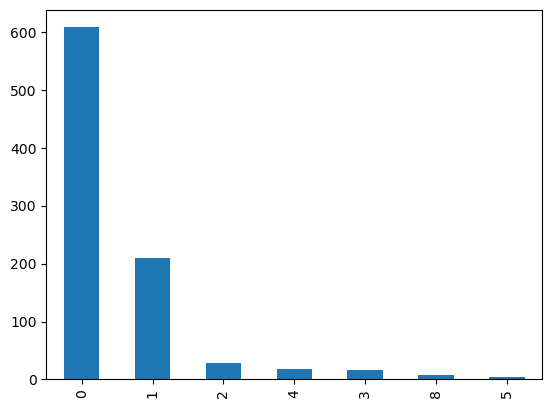

In [13]:
a['SibSp'].value_counts().plot(kind='bar')
a['SibSp'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

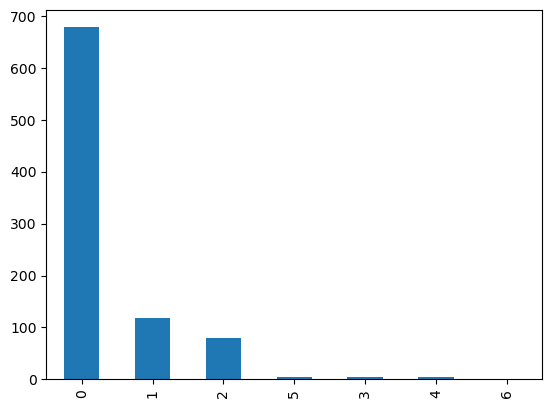

In [14]:
a['Parch'].value_counts().plot(kind='bar')
a['Parch'].value_counts()

In [15]:
a.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
a.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
a.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
cols=['Name','Sex','Ticket','Cabin','Embarked']
a[cols]=a[cols].apply(la.fit_transform)

In [19]:
a.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float64
Cabin            int64
Embarked         int64
dtype: object

In [20]:
a.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [21]:
# missing values in'age' is are replaced with mean()

a['Age']=a['Age'].fillna(a['Age'].mean())

In [22]:
a.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

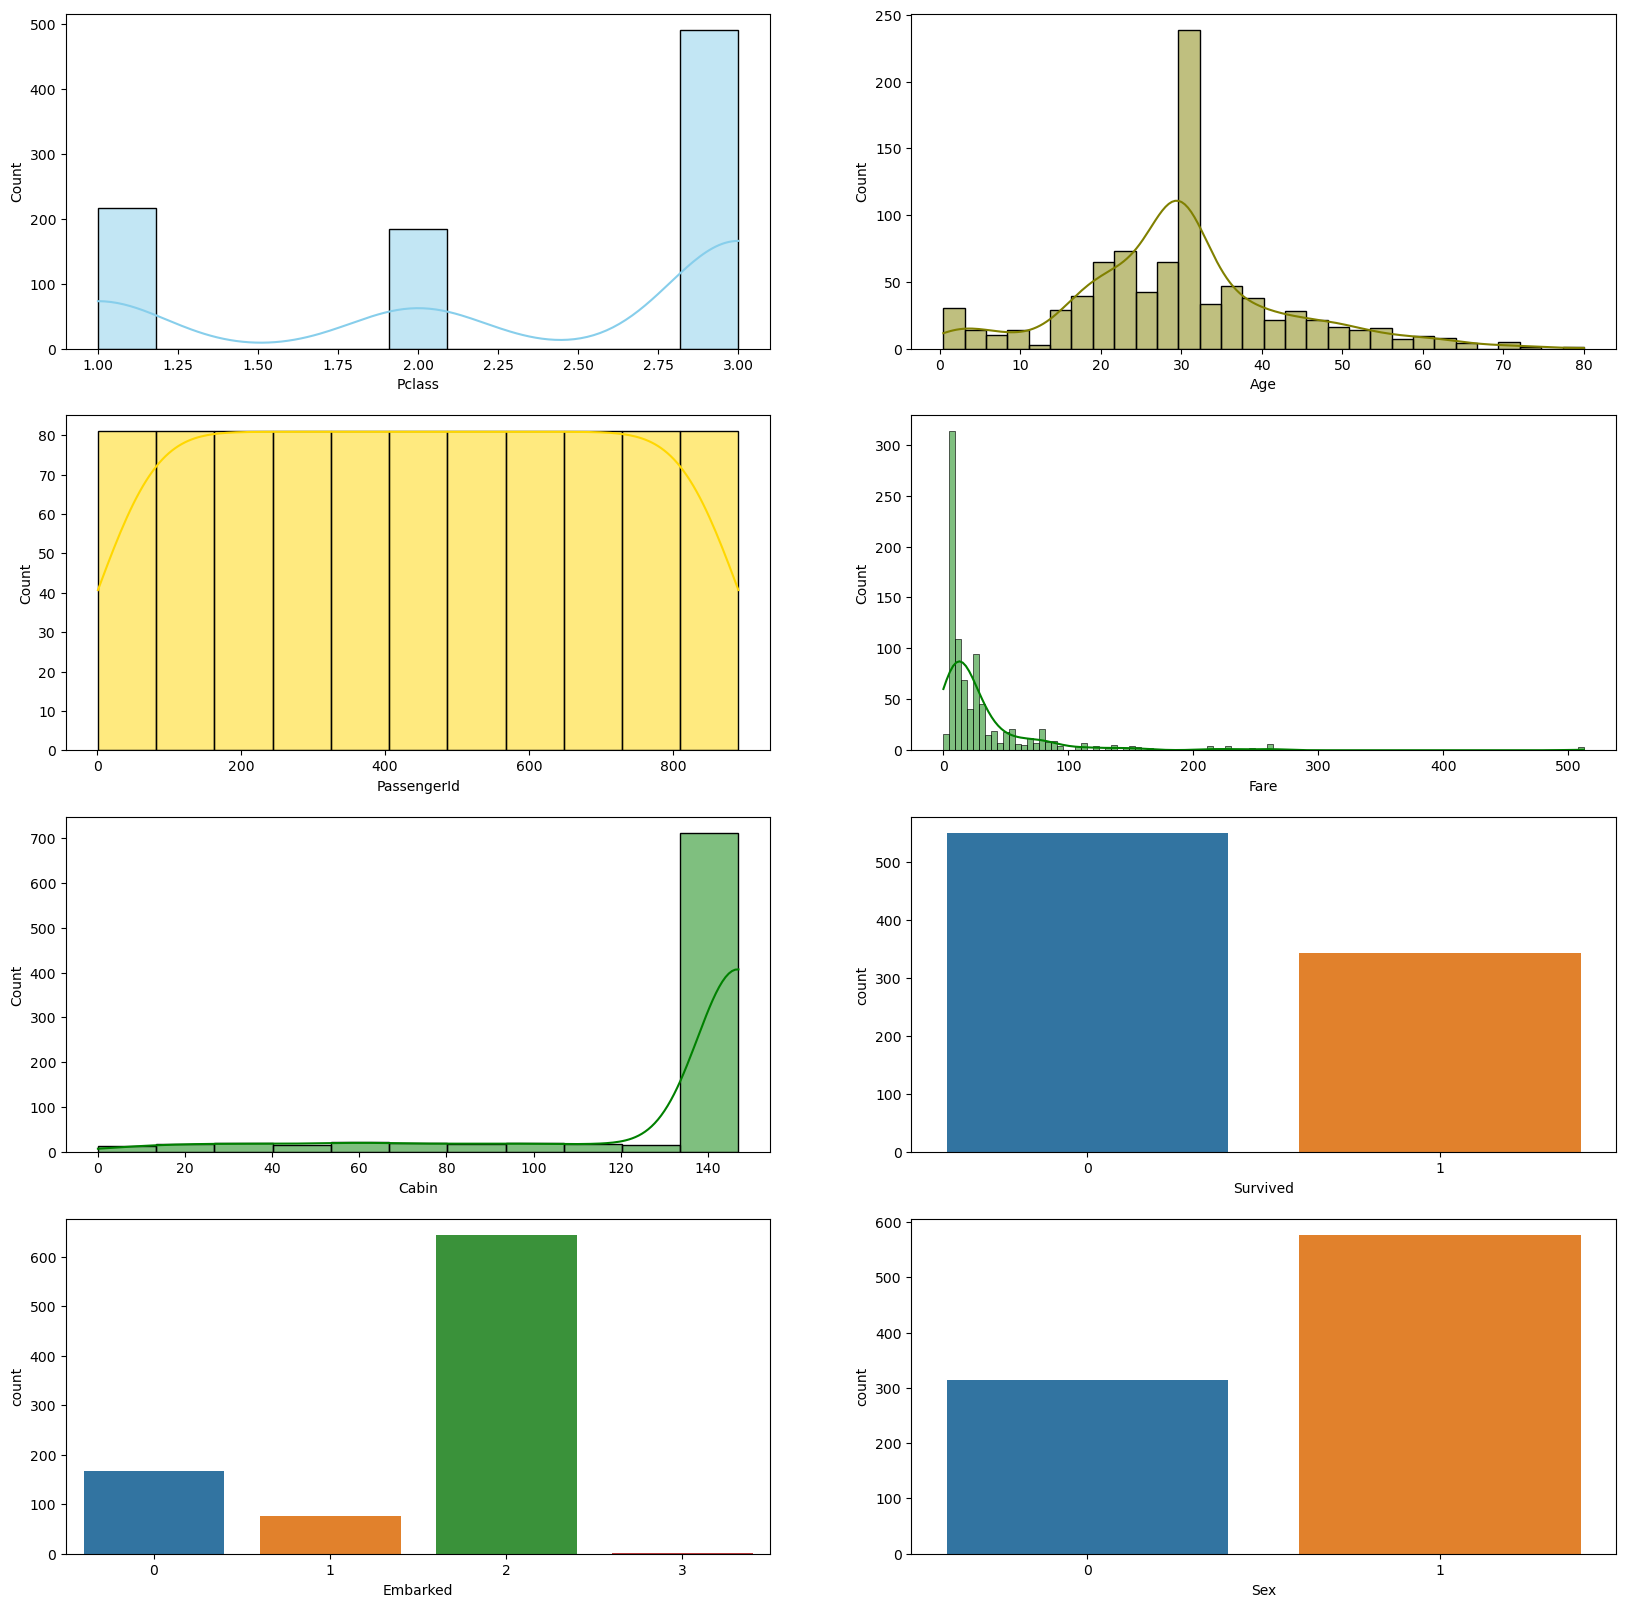

In [23]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
sns.histplot(data=a['Pclass'], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=a['Age'], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=a['PassengerId'], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=a['Fare'], kde=True, color="green", ax=axs[1, 1])
sns.histplot(data=a['Cabin'], kde=True, color="green", ax=axs[2, 0])
sns.countplot(x = a["Survived"], ax=axs[2, 1])
sns.countplot(x = a["Embarked"], ax=axs[3, 0])
sns.countplot(x = a["Sex"], ax=axs[3, 1])

In [24]:
a=a.drop(['PassengerId'],axis=1)
a

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,108,1,22.000000,1,0,523,7.2500,147,2
1,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,1,3,353,0,26.000000,0,0,669,7.9250,147,2
3,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,0,3,15,1,35.000000,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,548,1,27.000000,0,0,101,13.0000,147,2
887,1,1,303,0,19.000000,0,0,14,30.0000,30,2
888,0,3,413,0,29.699118,1,2,675,23.4500,147,2
889,1,1,81,1,26.000000,0,0,8,30.0000,60,0


In [25]:
# splitting dataset   x(inputs) & y(output)

x=a.drop(['Survived'],axis=1)
y=a['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [26]:
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,108,1,22.000000,1,0,523,7.2500,147,2
1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,353,0,26.000000,0,0,669,7.9250,147,2
3,1,272,0,35.000000,1,0,49,53.1000,55,2
4,3,15,1,35.000000,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...
886,2,548,1,27.000000,0,0,101,13.0000,147,2
887,1,303,0,19.000000,0,0,14,30.0000,30,2
888,3,413,0,29.699118,1,2,675,23.4500,147,2
889,1,81,1,26.000000,0,0,8,30.0000,60,0


In [27]:
# implementing train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
445,1,216,1,4.000000,0,2,289,81.8583,10,2
650,3,544,1,29.699118,0,0,366,7.8958,147,2
172,3,408,0,1.000000,1,1,344,11.1333,147,2
450,2,854,1,36.000000,1,2,561,27.7500,147,2
314,2,342,1,43.000000,1,1,571,26.2500,147,2
...,...,...,...,...,...,...,...,...,...,...
106,3,724,0,21.000000,0,0,296,7.6500,147,2
270,1,125,1,29.699118,0,0,47,31.0000,147,2
860,3,325,1,41.000000,2,0,399,14.1083,147,2
435,1,143,0,14.000000,1,2,33,120.0000,47,2


In [28]:
y_train

445    1
650    0
172    1
450    0
314    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 623, dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [30]:
# Since it is a classification model,we implememt all the 5 classification algorithms

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model1=KNeighborsClassifier(n_neighbors=9,weights='uniform')
model2=GaussianNB()
model3=SVC()
model4=DecisionTreeClassifier(criterion='entropy')
model5=RandomForestClassifier(n_estimators=100)

modellist=[model1,model2,model3,model4,model5]

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

for i in modellist:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('the classification details of model',i,'is below')
    print('the confusion matrix of ',i,'is')
    print( confusion_matrix(y_test,y_pred))
    print('accuracy score of',i,'is')
    print(accuracy_score(y_test,y_pred))
    print('the classification report of',i,'is')
    print(classification_report(y_test,y_pred))

the classification details of model KNeighborsClassifier(n_neighbors=9) is below
the confusion matrix of  KNeighborsClassifier(n_neighbors=9) is
[[141  16]
 [ 38  73]]
accuracy score of KNeighborsClassifier(n_neighbors=9) is
0.7985074626865671
the classification report of KNeighborsClassifier(n_neighbors=9) is
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       157
           1       0.82      0.66      0.73       111

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.80      0.79       268

the classification details of model GaussianNB() is below
the confusion matrix of  GaussianNB() is
[[136  21]
 [ 44  67]]
accuracy score of GaussianNB() is
0.7574626865671642
the classification report of GaussianNB() is
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       157
           1       0.76      0.6

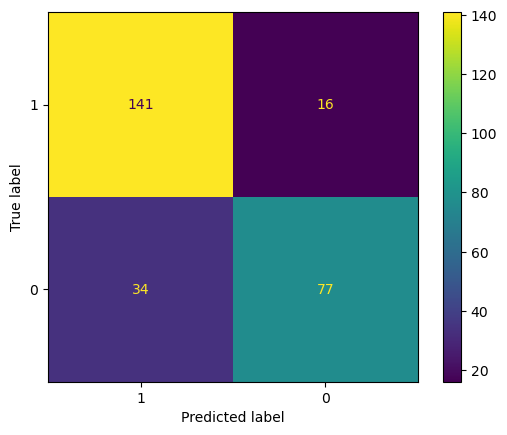

In [32]:
from sklearn.metrics._plot.confusion_matrix  import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred) 
cm=['1','0'] 
cmd=ConfusionMatrixDisplay(result,display_labels=cm)
cmd.plot()

<AxesSubplot:>

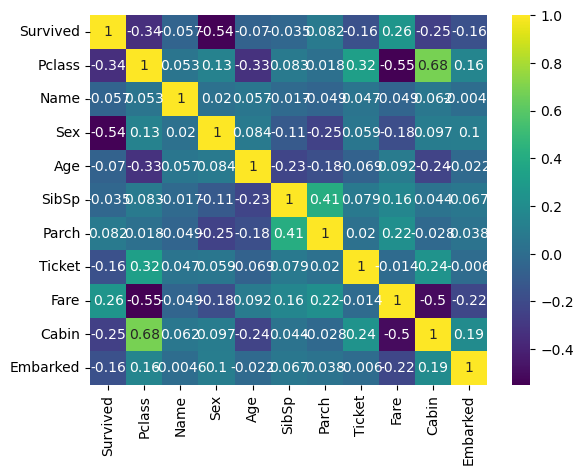

In [33]:
sns.heatmap(a.corr(),annot=True,cmap='viridis')

In [34]:
# Now we implement on testing data

a1=a1.drop(['PassengerId'],axis=1)
a1

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [35]:
a1.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [36]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
cols=['Name','Sex','Ticket','Cabin','Embarked']
a1[cols]=a1[cols].apply(la.fit_transform)

2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64

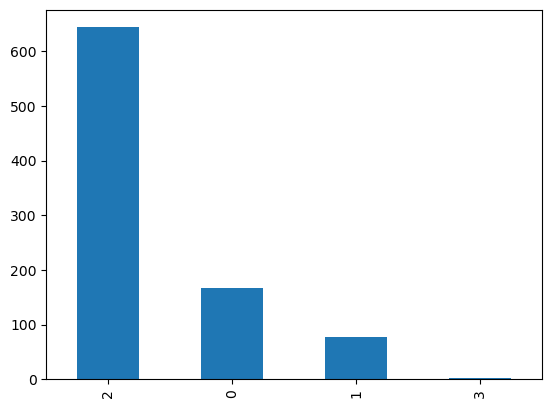

In [37]:
a['Embarked'].value_counts().plot(kind='bar')
a['Embarked'].value_counts()

In [38]:
a1.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [39]:
a1.isna().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Cabin        0
Embarked     0
dtype: int64

In [40]:
# missing values in 'Age' and 'Fare' are replaced with mean()

a1['Age']=a1['Age'].fillna(a1['Age'].mean())
a1['Fare']=a1['Fare'].fillna(a1['Fare'].mean())

<AxesSubplot:xlabel='Sex', ylabel='count'>

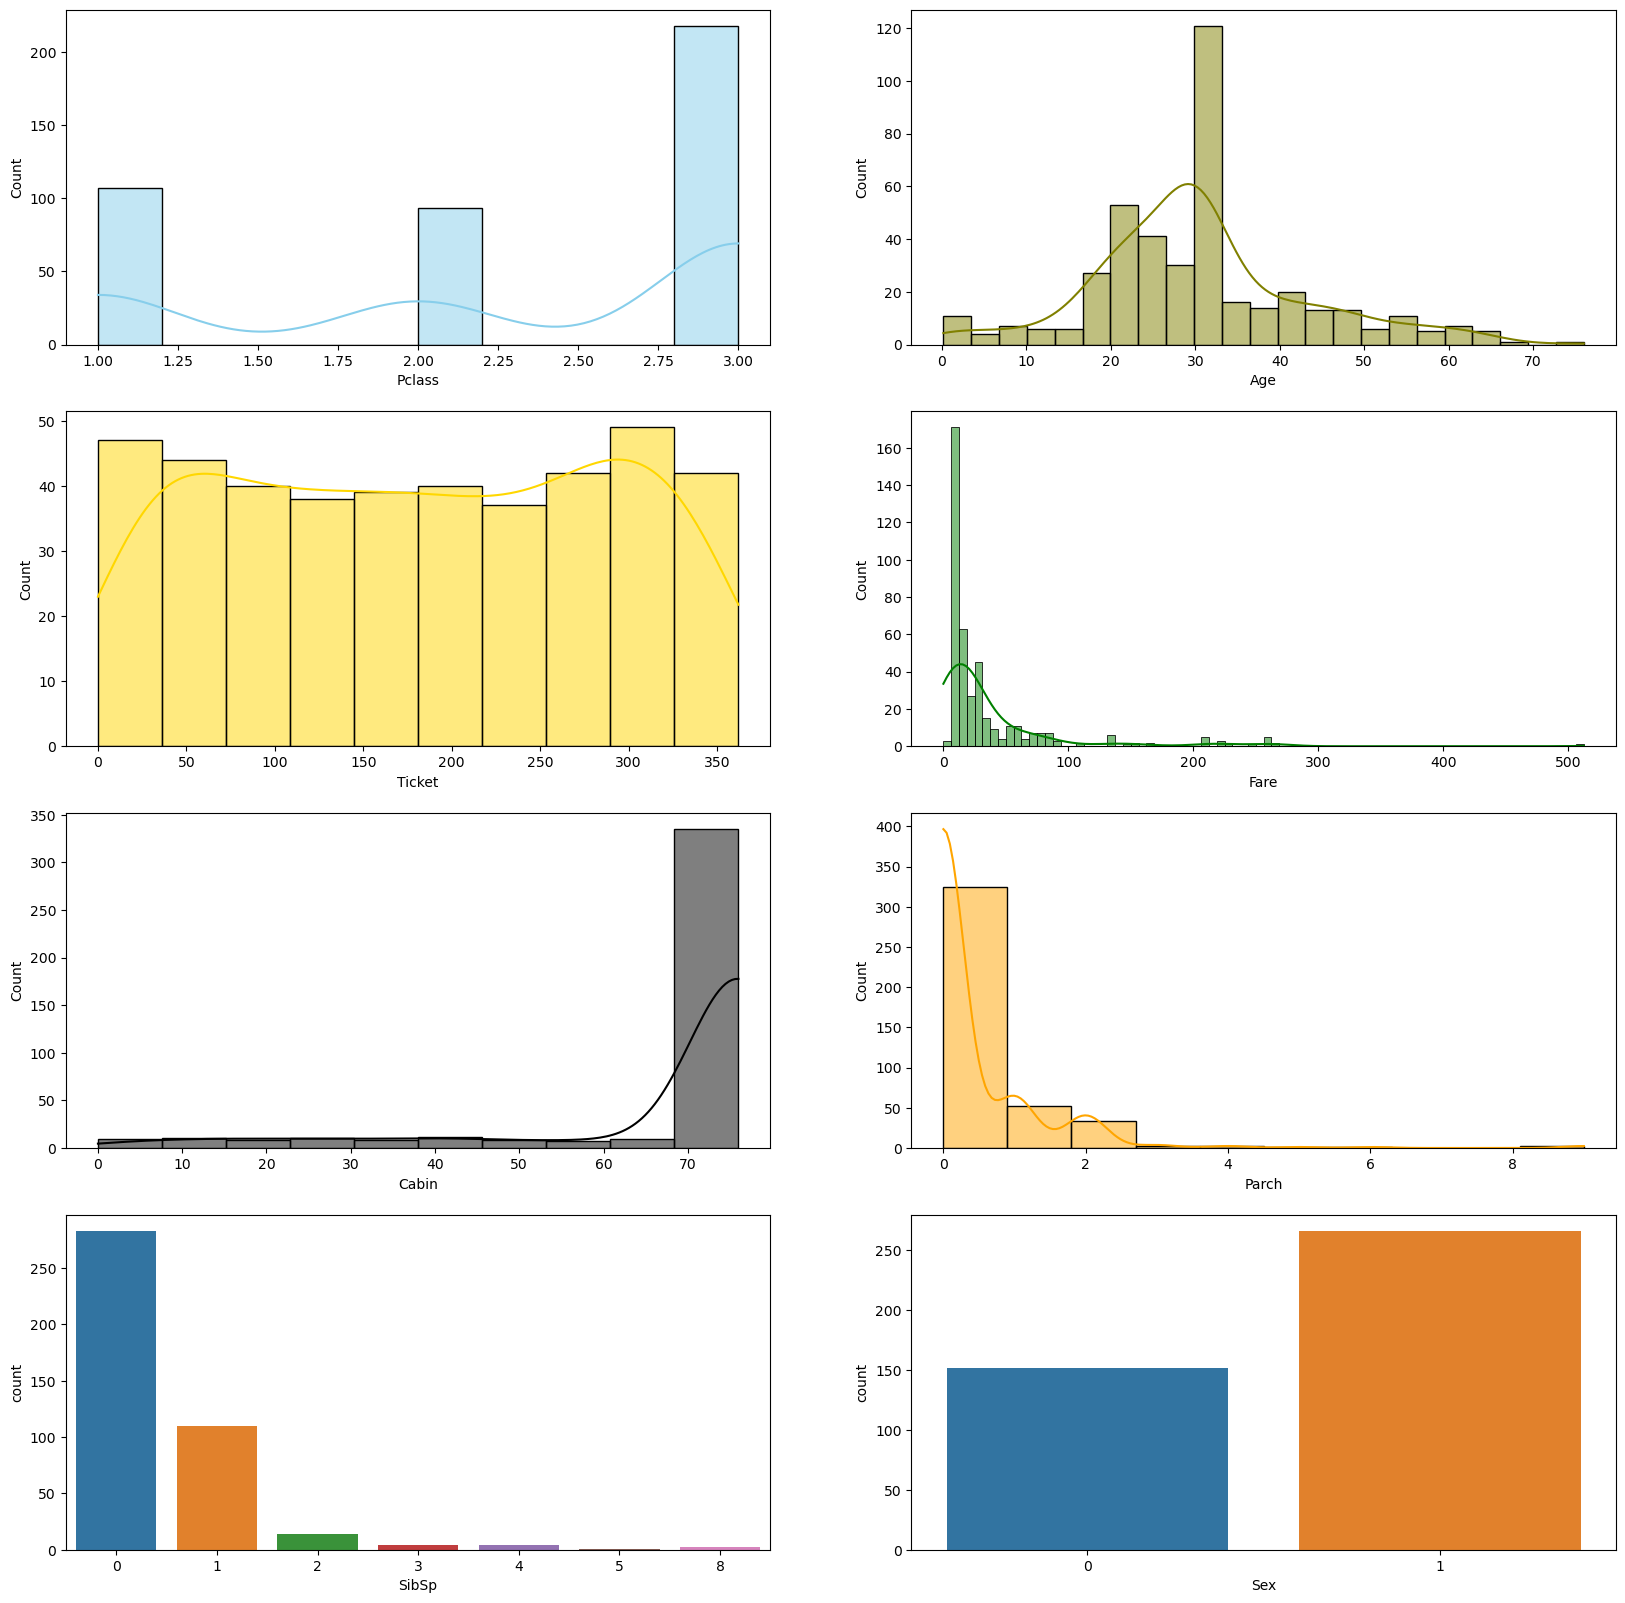

In [41]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
sns.histplot(data=a1['Pclass'], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=a1['Age'], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=a1['Ticket'], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=a1['Fare'], kde=True, color="green", ax=axs[1, 1])
sns.histplot(data=a1['Cabin'], kde=True, color="black", ax=axs[2, 0])
sns.histplot(data=a1['Parch'], kde=True, color="orange", ax=axs[2, 1])
sns.countplot(x = a1['SibSp'], ax=axs[3, 0])
sns.countplot(x = a1["Sex"], ax=axs[3, 1])

In [42]:
# splitting dataset   x(inputs) & y(output)

x=a1.drop(['Embarked'],axis=1)
y=a1['Embarked']
y

0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int64

In [43]:
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,3,206,1,34.50000,0,0,152,7.8292,76
1,3,403,0,47.00000,1,0,221,7.0000,76
2,2,269,1,62.00000,0,0,73,9.6875,76
3,3,408,1,27.00000,0,0,147,8.6625,76
4,3,178,0,22.00000,1,1,138,12.2875,76
...,...,...,...,...,...,...,...,...,...
413,3,353,1,30.27259,0,0,267,8.0500,76
414,1,283,0,39.00000,0,0,324,108.9000,22
415,3,332,1,38.50000,0,0,346,7.2500,76
416,3,384,1,30.27259,0,0,220,8.0500,76


In [44]:
# Implementing Training and Testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

x_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
118,1,28,1,36.00000,0,0,33,75.2417,38
271,3,146,1,30.27259,0,0,235,7.7500,76
114,1,364,0,63.00000,1,0,303,221.7792,37
311,3,380,1,22.00000,0,0,101,7.2250,76
131,1,161,1,53.00000,0,0,17,28.5000,34
...,...,...,...,...,...,...,...,...,...
71,3,263,1,21.00000,0,0,194,7.8958,76
106,3,52,1,21.00000,0,0,153,7.8208,76
270,1,252,1,46.00000,0,0,33,75.2417,38
348,2,157,1,24.00000,0,0,82,13.5000,76


In [45]:
y_train

118    0
271    1
114    2
311    0
131    0
      ..
71     2
106    1
270    0
348    2
102    1
Name: Embarked, Length: 292, dtype: int64

In [46]:
# Preprocessing Steps

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test-scalar.fit_transform(x_test)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
321,2.123691,217.877426,0.305484,25.346541,0.494680,0.328091,97.825024,7.744928,69.950171
324,2.577357,218.869109,1.439851,38.094918,0.494680,0.328091,76.031559,206.876868,75.616804
388,2.123691,59.208118,0.305484,21.704148,0.494680,0.328091,224.623364,8.253030,75.616804
56,2.123691,86.975247,0.305484,34.452525,0.494680,0.328091,197.876839,8.395275,75.616804
153,2.123691,216.885743,1.439851,35.363123,0.494680,0.405323,213.726631,12.578242,75.616804
...,...,...,...,...,...,...,...,...,...
101,2.350524,389.438614,0.305484,27.167738,0.272530,0.328091,58.200543,26.058077,75.616804
310,2.123691,57.224752,0.305484,18.972353,0.494680,0.328091,142.402565,9.143282,75.616804
29,2.123691,337.871089,0.305484,30.147753,0.050381,0.328091,104.759308,21.842623,75.616804
195,2.123691,200.027129,0.305484,32.631328,0.494680,0.328091,186.980106,8.354690,75.616804


In [47]:
# Here we implement 5 classification models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model11=KNeighborsClassifier(n_neighbors=9,weights='uniform')
model22=GaussianNB()
model33=SVC()
model44=DecisionTreeClassifier(criterion='entropy')
model55=RandomForestClassifier(n_estimators=100)

modellist=[model11,model22,model33,model44,model55]

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

for i in modellist:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('the classification details of model',i,'is below')
    print('the confusion matrix of ',i,'is')
    print( confusion_matrix(y_test,y_pred))
    print('accuracy score of',i,'is')
    print(accuracy_score(y_test,y_pred))
    print('the classification report of',i,'is')
    print(classification_report(y_test,y_pred))

the classification details of model KNeighborsClassifier(n_neighbors=9) is below
the confusion matrix of  KNeighborsClassifier(n_neighbors=9) is
[[ 6  0 21]
 [ 0  0 14]
 [ 5  0 80]]
accuracy score of KNeighborsClassifier(n_neighbors=9) is
0.6825396825396826
the classification report of KNeighborsClassifier(n_neighbors=9) is
              precision    recall  f1-score   support

           0       0.55      0.22      0.32        27
           1       0.00      0.00      0.00        14
           2       0.70      0.94      0.80        85

    accuracy                           0.68       126
   macro avg       0.41      0.39      0.37       126
weighted avg       0.59      0.68      0.61       126

the classification details of model GaussianNB() is below
the confusion matrix of  GaussianNB() is
[[27  0  0]
 [14  0  0]
 [85  0  0]]
accuracy score of GaussianNB() is
0.21428571428571427
the classification report of GaussianNB() is
              precision    recall  f1-score   support

   

In [49]:
y_train.head(10)

118    0
271    1
114    2
311    0
131    0
157    2
152    2
371    0
399    1
272    0
Name: Embarked, dtype: int64

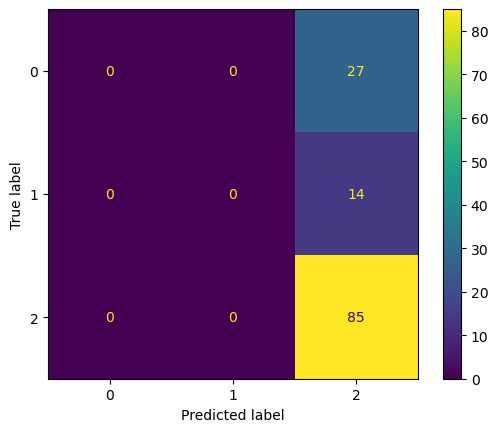

In [50]:
from sklearn.metrics._plot.confusion_matrix  import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred) 
cm=['0','1','2'] 
cmd=ConfusionMatrixDisplay(result,display_labels=cm)
cmd.plot()

<AxesSubplot:>

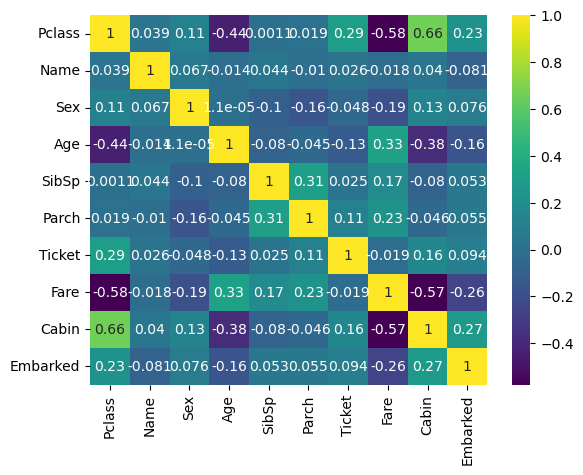

In [51]:
sns.heatmap(a1.corr(),annot=True,cmap='viridis')